# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


c:\Users\bruno\anaconda3\envs\study_keras\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
PATH_DATA = "../data/Passageiros.csv"


# Code

## Configurations

In [19]:
mpl.rcParams['figure.figsize']=(10,6)

## Export and view data

In [3]:
df_passengers = pd.read_csv(PATH_DATA)
df_passengers.sample(5)


,tempo,passageiros
60,1954.000000,204
77,1955.416667,315
94,1956.833333,271
46,1952.833333,172
90,1956.500000,413


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

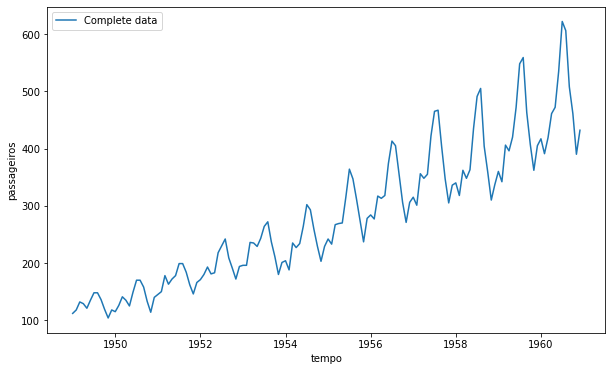

In [20]:
sns.lineplot(
    data=df_passengers,
    x='tempo',
    y='passageiros',
    label='Complete data'
)


## Scaler data

In [6]:
sc = StandardScaler()


In [7]:
sc.fit(df_passengers)

StandardScaler()

In [8]:
scaler_data=sc.transform(df_passengers)

In [9]:
x = scaler_data[:, 0]
y = scaler_data[:, 1]


<AxesSubplot:>

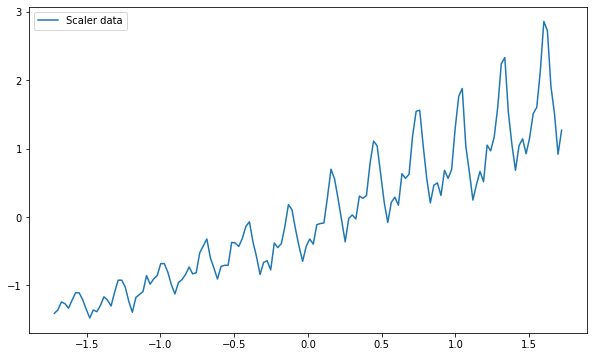

In [21]:
sns.lineplot(
    x=x,
    y=y,
    label='Scaler data'
)


## Split data to train

In [11]:
data_size = len(df_passengers)
size_train = int(data_size*0.9)
size_test = data_size-size_train


In [12]:
x_train, y_train, x_test, y_test = (
    x[0:size_train], y[0:size_train], 
    x[size_train:data_size], y[size_train:data_size]
    )


<AxesSubplot:>

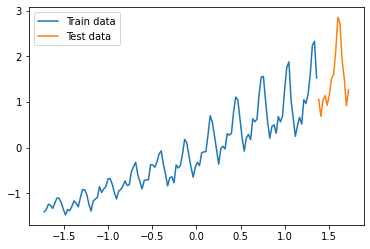

In [13]:
sns.lineplot(
    x=x_train,
    y=y_train,
    label='Train data'
)
sns.lineplot(
    x=x_test,
    y=y_test,
    label='Test data'
)


## Linear regression

In [37]:
model_regression = Sequential()
model_regression.add(
    Dense(
        1,
        input_dim=1,
        kernel_initializer='Ones',
        activation='linear',
        use_bias=False
    )
)
model_regression.compile(loss='mean_squared_error', optimizer='adam')


In [38]:
model_regression.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [39]:
model_regression.fit(x_train,y_train)

5/5 [==============================] - 0s 4ms/step - loss: 0.1285


In [40]:
y_predict=model_regression.predict(x_train)

5/5 [==============================] - 0s 1ms/step


[Text(0.5, 1.0, 'Predict with linear regression')]

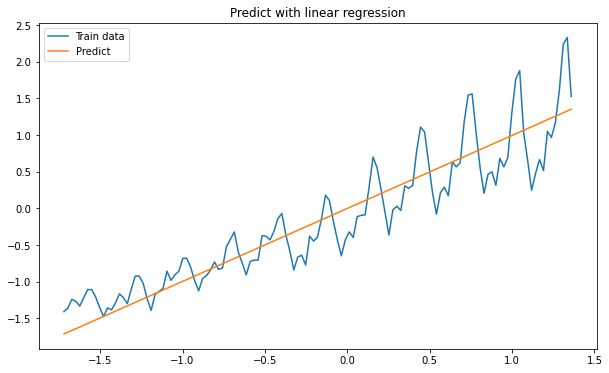

In [41]:
sns.lineplot(
    x=x_train,
    y=y_train,
    label='Train data'
)
sns.lineplot(
    x=x_train,
    y=y_predict[:,0],
    label='Predict'
).set(title="Predict with linear regression")



### Back to initial values

In [43]:
df_result_linear_regression =pd.DataFrame({
    'time':x_train,
    'passengers': y_predict[:,0]
})

df_result_linear_regression.sample(5)

,time,passengers
112,0.974302,0.969780
3,-1.647894,-1.640245
47,-0.589393,-0.586657
104,0.781847,0.778218
7,-1.551666,-1.544464


In [44]:
df_result_linear_regression_transf = pd.DataFrame(
    sc.inverse_transform(df_result_linear_regression),
    columns=["time", "passengers"]
)
df_result_linear_regression_transf.sample(5)

,time,passengers
16,1950.333333,121.423023
95,1956.916667,347.570257
70,1954.833333,276.004676
78,1955.500000,298.905663
123,1959.250000,427.723719


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

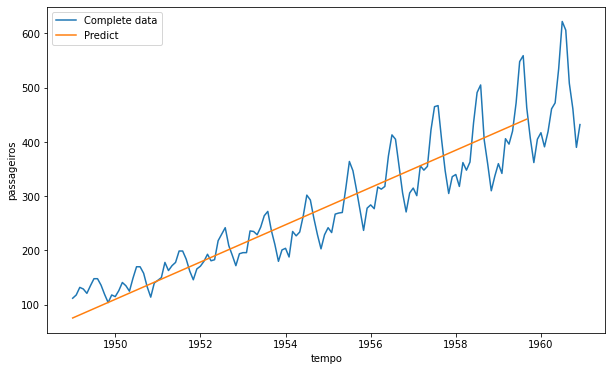

In [45]:
sns.lineplot(
    data=df_passengers,
    x='tempo',
    y='passageiros',
    label='Complete data'
)
sns.lineplot(
    data=df_result_linear_regression_transf,
    x='time',
    y='passengers',
    label='Predict'
)


In [47]:
y_predict_test= model_regression.predict(x_test)


1/1 [==============================] - 0s 20ms/step


In [48]:
df_result_linear_regression_test = pd.DataFrame({
    'time': x_test,
    'passengers': y_predict_test[:, 0]
})

df_result_linear_regression_test.sample(5)


,time,passengers
2,1.431382,1.424738
0,1.383268,1.376848
4,1.479496,1.472629
14,1.720064,1.712080
1,1.407325,1.400793


In [49]:
df_result_linear_regression_test_transf = pd.DataFrame(
    sc.inverse_transform(df_result_linear_regression_test),
    columns=["time", "passengers"]
)
df_result_linear_regression_test_transf.sample(5)


,time,passengers
0,1959.750000,444.899453
2,1959.916667,450.624708
3,1960.000000,453.487321
11,1960.666667,476.388324
9,1960.500000,470.663070


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

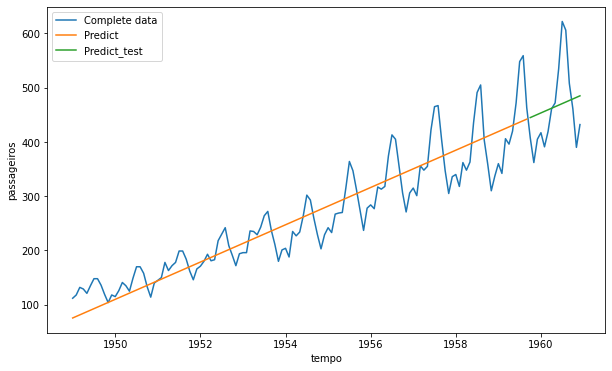

In [50]:
sns.lineplot(
    data=df_passengers,
    x='tempo',
    y='passageiros',
    label='Complete data'
)
sns.lineplot(
    data=df_result_linear_regression_transf,
    x='time',
    y='passengers',
    label='Predict'
)
sns.lineplot(
    data=df_result_linear_regression_test_transf,
    x='time',
    y='passengers',
    label='Predict_test'
)


## Linear regression multi fields

In [68]:
model_regression_multi_fields = Sequential(
   [ 
    Dense(
        8,
        input_dim=1,
        kernel_initializer='random_uniform',
        activation='sigmoid',
        use_bias=False
    ), 
    Dense(
        8,
        kernel_initializer='random_uniform',
        activation='sigmoid',
        use_bias=False
    ),
    Dense(
        1,
        kernel_initializer='random_uniform',
        activation='linear',
        use_bias=False
    )
    ]
)
model_regression_multi_fields.compile(loss='mean_squared_error', optimizer='adam')


In [69]:
model_regression_multi_fields.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 8)                 8         
                                                                 
 dense_21 (Dense)            (None, 8)                 64        
                                                                 
 dense_22 (Dense)            (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [73]:
model_regression_multi_fields.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.2446
Epoch 2/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.2437
Epoch 3/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.2426
Epoch 4/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.2419
Epoch 5/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.2415
Epoch 6/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.2408
Epoch 7/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.2401
Epoch 8/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.2393
Epoch 9/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.2386
Epoch 10/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.2381
Epoch 11/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.2376
Epoch 12/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.2367
Epoch 13/1000
5/5 [==============================

In [74]:
y_predict = model_regression_multi_fields.predict(x_train)
y_predict_test = model_regression_multi_fields.predict(x_test)


1/1 [==============================] - 0s 17ms/step


<AxesSubplot:>

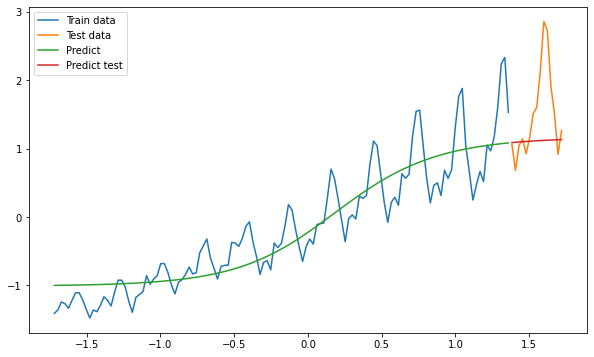

In [75]:
sns.lineplot(
    x=x_train,
    y=y_train,
    label='Train data'
)
sns.lineplot(
    x=x_test,
    y=y_test,
    label='Test data'
)
sns.lineplot(
    x=x_train,
    y=y_predict[:,0],
    label='Predict'
)
sns.lineplot(
    x=x_test,
    y=y_predict_test[:, 0],
    label='Predict test'
)
